## About the Data:
1. `id`: This column likely serves as a unique identifier for each transaction or item, which can be useful for tracking and record-keeping.
2. `item_date`: This column represents the date when each transaction or item was recorded or occurred. It's important for tracking the timing of business activities.
3. `quantity tons`: This column indicates the quantity of the item in tons, which is essential for inventory management and understanding the volume of products sold or produced.
4. `customer`: The "customer" column refers to the name or identifier of the customer who either purchased or ordered the items. It's crucial for maintaining customer relationships and tracking sales.
5. `country`: The "country" column specifies the country associated with each customer. This information can be useful for understanding the geographic distribution of customers and may have implications for logistics and international sales.
6. `status`: The "status" column likely describes the current status of the transaction or item. This information can be used to track the progress of orders or transactions, such as "Draft" or "Won."
7. `item type`: This column categorizes the type or category of the items being sold or produced. Understanding item types is essential for inventory categorization and business reporting.
8. `application`: The "application" column defines the specific use or application of the items. This information can help tailor marketing and product development efforts.
9. `thickness`: The "thickness" column provides details about the thickness of the items. It's critical when dealing with materials where thickness is a significant factor, such as metals or construction materials.
10. `width`: The "width" column specifies the width of the items. It's important for understanding the size and dimensions of the products.
11. `material_ref`: This column appears to be a reference or identifier for the material used in the items. It's essential for tracking the source or composition of the products.
12. `product_ref`: The "product_ref" column seems to be a reference or identifier for the specific product. This information is useful for identifying and cataloging products in a standardized way.
13. `delivery date`: This column records the expected or actual delivery date for each item or transaction. It's crucial for managing logistics and ensuring timely delivery to customers.
14. `selling_price`: The "selling_price" column represents the price at which the items are sold. This is a critical factor for revenue generation and profitability analysis.

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/copper.csv')
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [ ]:
df.columns = df.columns.str.replace(' ','_')

In [ ]:
df.drop(columns=['id','customer','material_ref'],inplace=True)

In [ ]:
df.nunique()

,0
item_date,252
quantity_tons,181673
country,17
status,9
item_type,7
application,30
thickness,594
width,1386
product_ref,33
delivery_date,28


In [ ]:
df.status.value_counts()

,count
status,
Won,116010
Lost,34438
Not lost for AM,19573
Revised,4276
To be approved,4170
Draft,3140
Offered,53
Offerable,10
Wonderful,1


In [ ]:
df = df[(df['status']=='Won') | (df['status']=='Lost')]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150448 entries, 0 to 181672
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      150447 non-null  float64
 1   quantity_tons  150448 non-null  object 
 2   country        150444 non-null  float64
 3   status         150448 non-null  object 
 4   item_type      150448 non-null  object 
 5   application    150445 non-null  float64
 6   thickness      150448 non-null  float64
 7   width          150448 non-null  float64
 8   product_ref    150448 non-null  int64  
 9   delivery_date  150447 non-null  float64
 10  selling_price  150447 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 13.8+ MB


In [ ]:
continous = ['quantity_tons','selling_price','width','thickness']
category = ['country','status','item_type','application','product_ref']
date = ['item_date','delivery_date']

In [ ]:
df['quantity_tons'] = pd.to_numeric(df['quantity_tons'],errors='coerce').astype('float64')

In [ ]:
for col in date:
    df[col] = pd.to_datetime(df[col],errors='coerce',format='%Y%m%d')

## Data Preprocessing

In [ ]:
df.isnull().sum()

,0
item_date,3
quantity_tons,1
country,4
status,0
item_type,0
application,3
thickness,0
width,0
product_ref,0
delivery_date,2


In [ ]:
df.item_date.fillna(df['item_date'].ffill(),inplace=True)
df.country.fillna(df.country.mode()[0],inplace=True)
df.application.fillna(df.application.mode()[0],inplace=True)
df['delivery_date'].fillna(df['delivery_date'].ffill(),inplace=True)
df['selling_price'].fillna(df.selling_price.mean(),inplace=True)
df['quantity_tons'].fillna(df.selling_price.mean(),inplace=True)

In [ ]:
li = []
for col in continous:
    col1 = df[df[col]<=0].shape[0]
    li.append((col,col1))
print(li)

[('quantity_tons', 3), ('selling_price', 5), ('width', 0), ('thickness', 0)]


In [ ]:
# These should be treated as null values
for col in continous:
    df.loc[df[col]<=0,col] = np.nan

In [ ]:
df.isnull().sum()

,0
item_date,0
quantity_tons,0
country,0
status,0
item_type,0
application,0
thickness,0
width,0
product_ref,0
delivery_date,0


In [ ]:
df['selling_price'].fillna(df.selling_price.mean(),inplace=True)
df['quantity_tons'].fillna(df.selling_price.mean(),inplace=True)

In [ ]:
def plot(df,column):
    plt.figure(figsize=(20,5))

    plt.subplot(1,3,1)
    sns.histplot(data=df,x=column,kde=True,bins=50,color='green')
    plt.title(f'Distribution of {column}')

    plt.subplot(1,3,2)
    sns.boxplot(data=df,x=column,color='red')
    plt.title(f'Boxplot of {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=column,color='indigo')
    plt.title(f'Violin plot of {column}')
    plt.show()

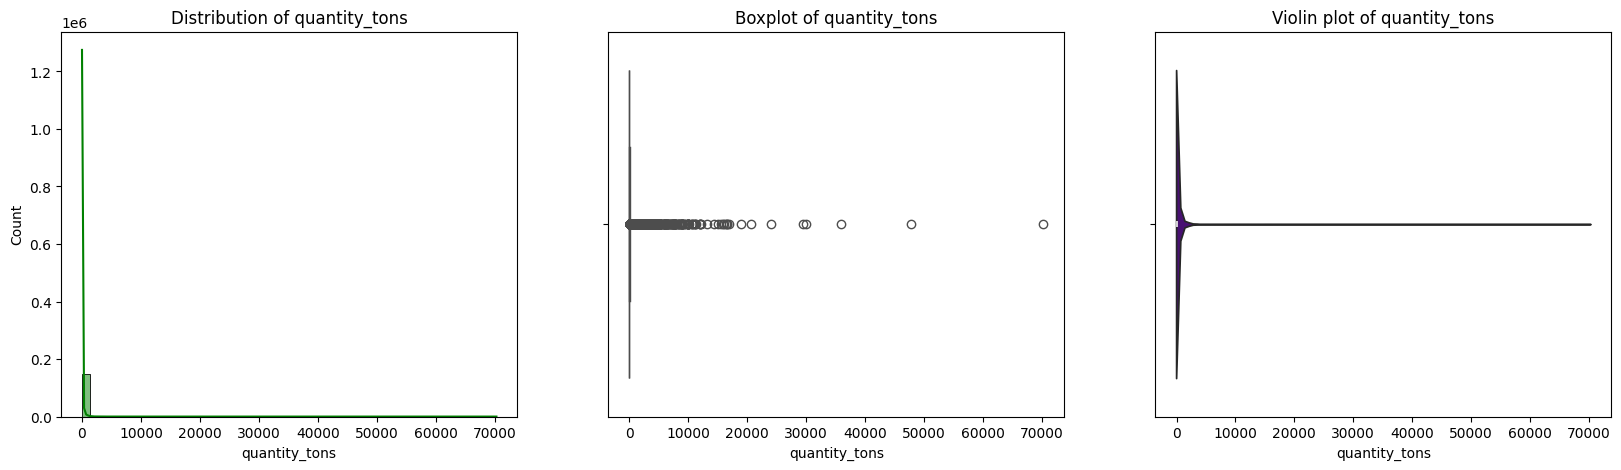

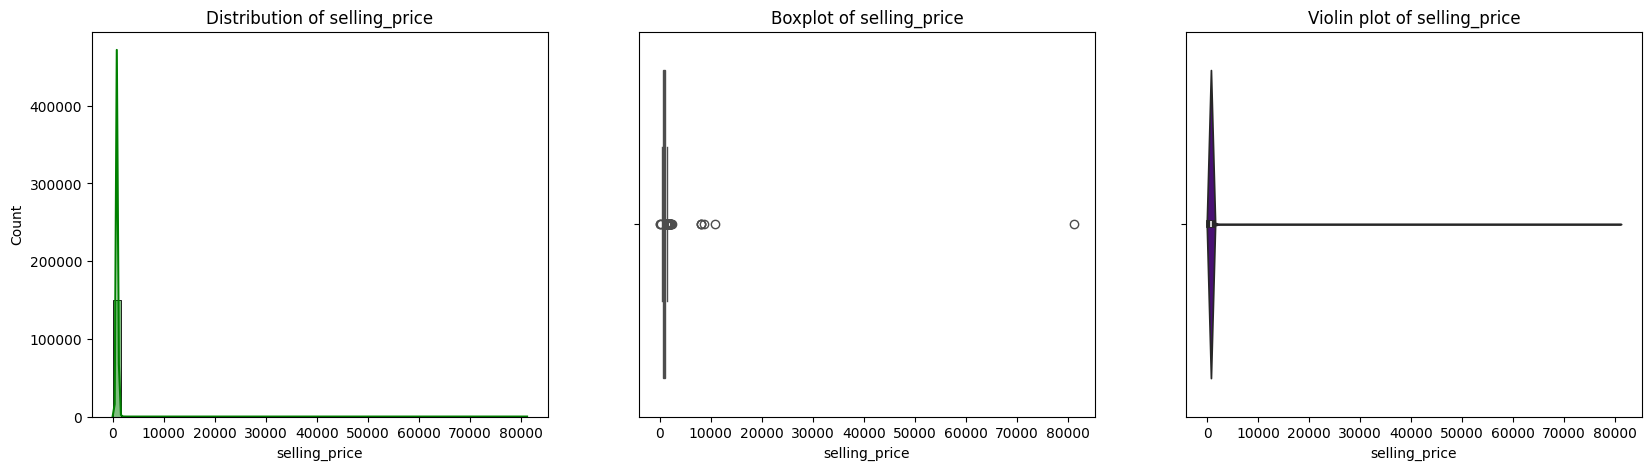

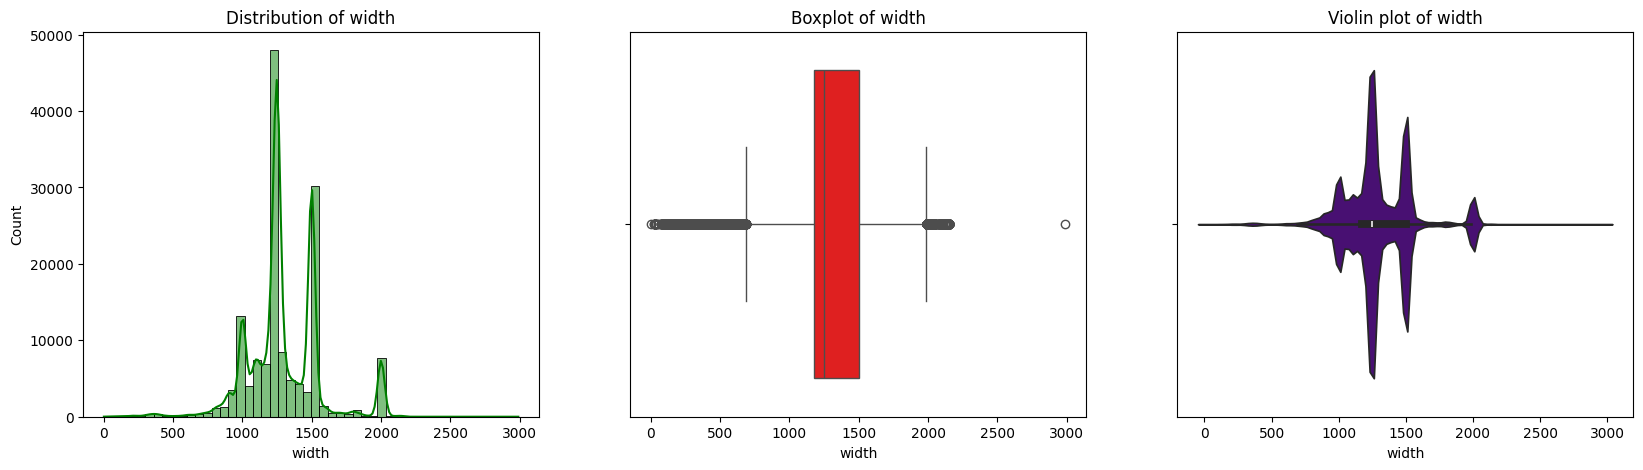

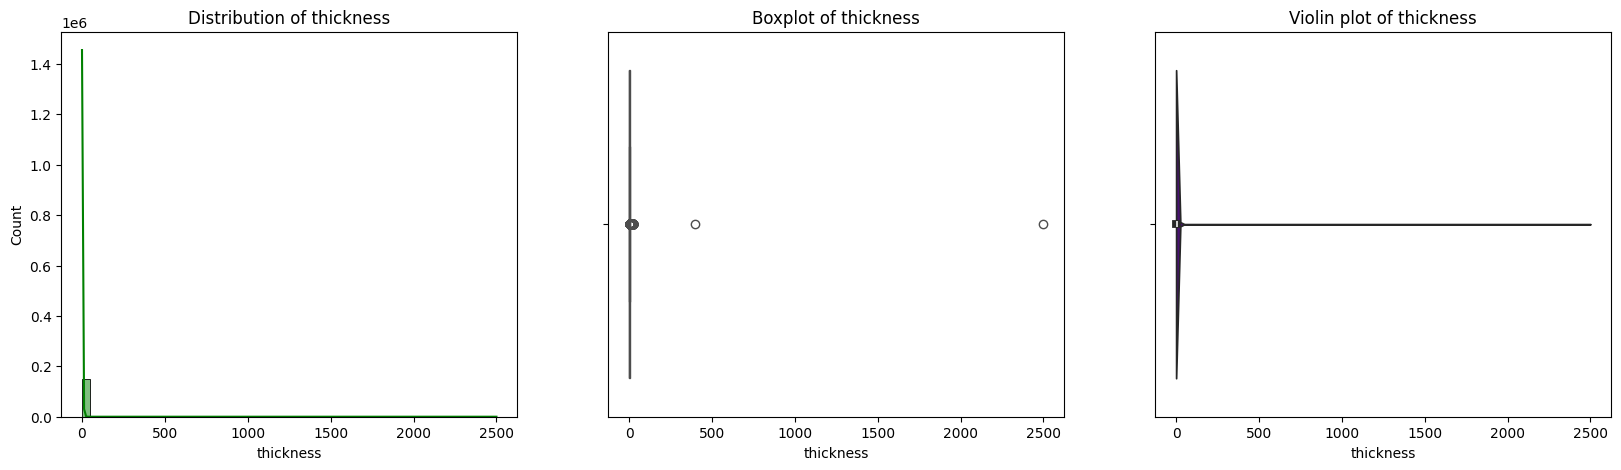

In [ ]:
for col in continous:
    plot(df,col)

In [ ]:
log_df = df.copy()
for col in continous:
    log_df[col] = np.log(log_df[col])

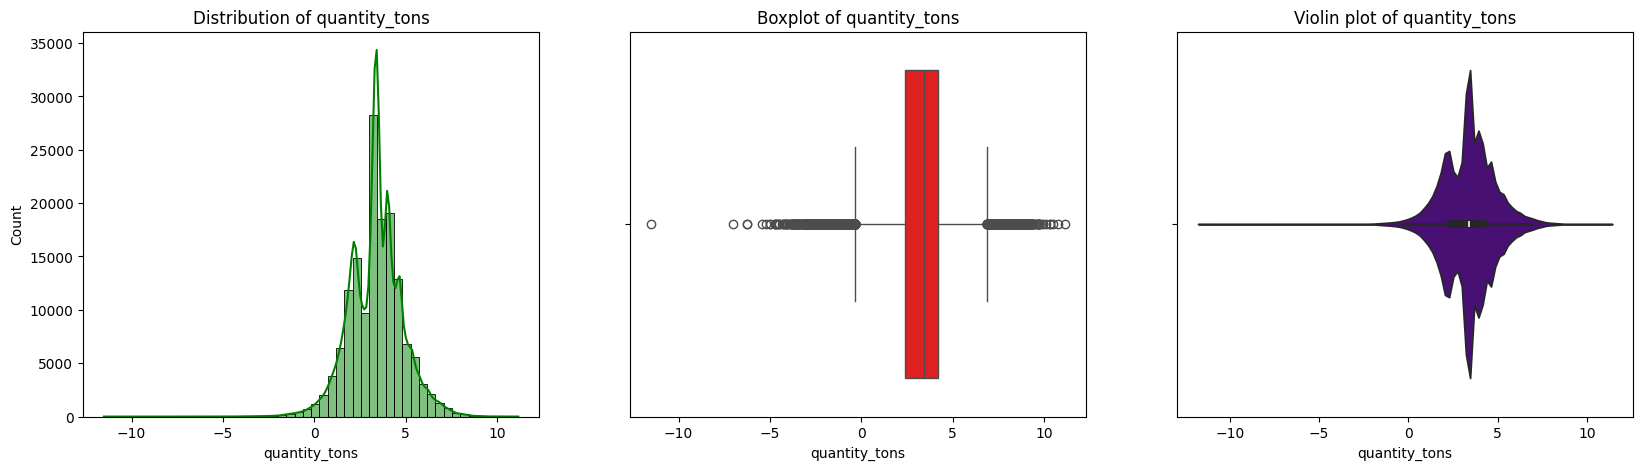

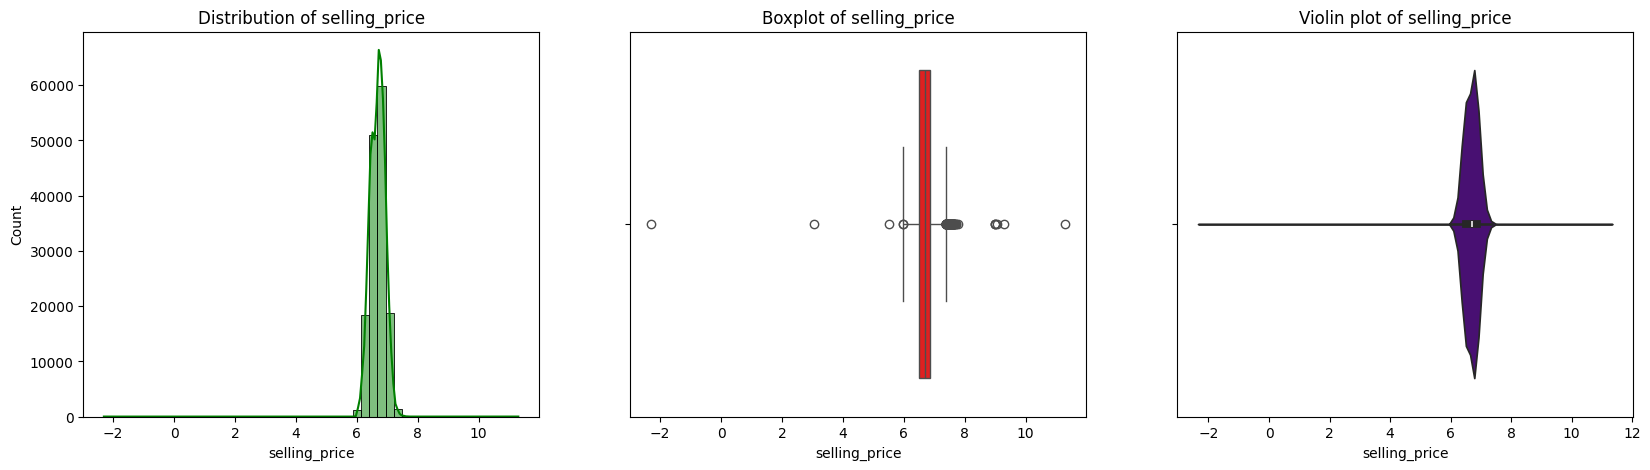

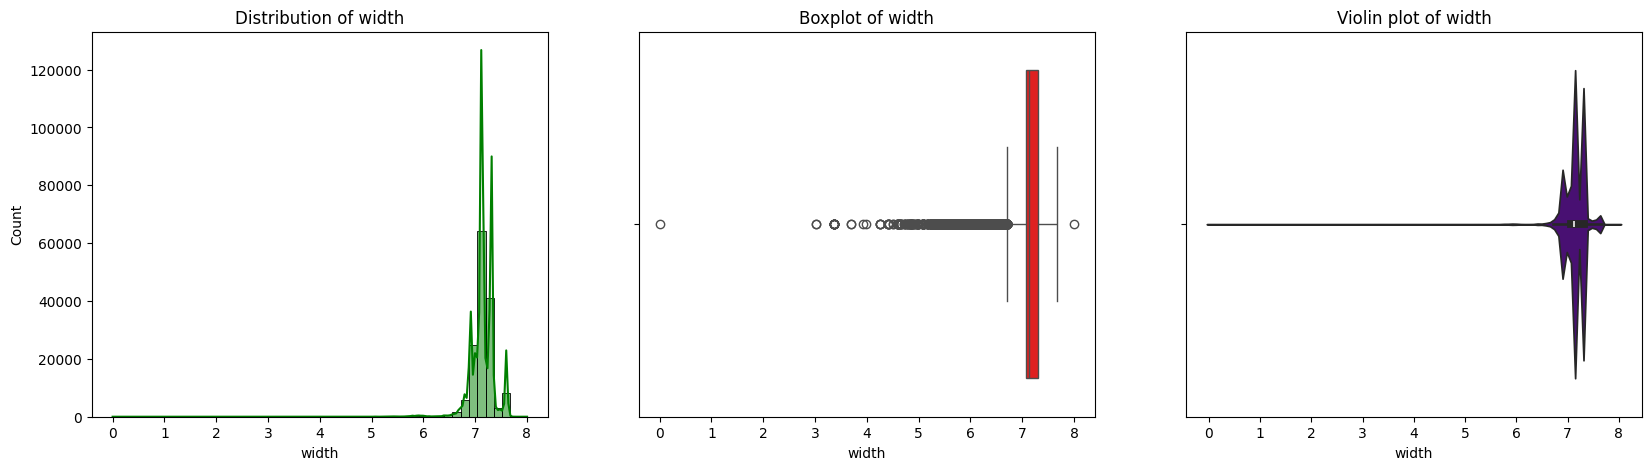

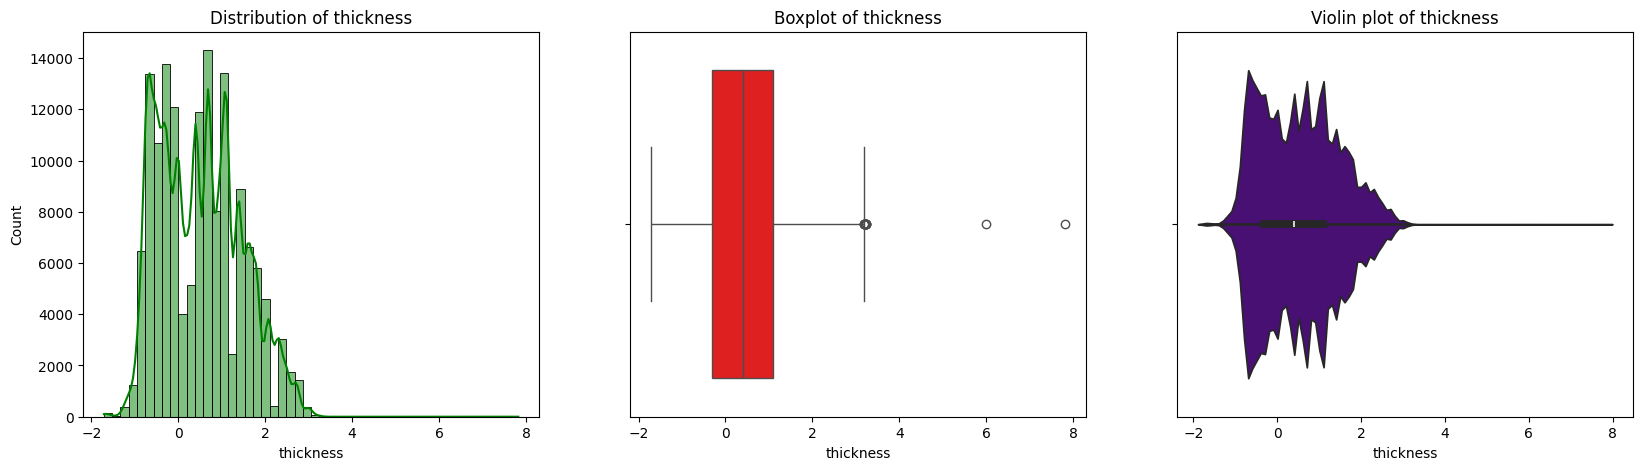

In [ ]:
for col in continous:
    plot(log_df,col)

### Feature Engineering


In [ ]:
# Delivery time
df['delivery_time'] = (df['delivery_date'] - df['item_date']).dt.days

In [ ]:
df[df['delivery_time']<0]

,item_date,quantity_tons,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price,delivery_time
2,2021-04-01,386.127949,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,-90
3,2021-04-01,202.411065,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,-90
4,2021-04-01,785.526262,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,-31
7,2021-04-01,113.387124,32.0,Won,W,41.0,0.68,1220.0,611993,2021-01-01,931.00,-90
11,2021-04-01,113.995666,32.0,Won,W,41.0,0.55,1220.0,611993,2021-01-01,954.00,-90
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,-1
181669,2020-07-02,208.086469,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,-1
181670,2020-07-02,4.235594,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,-1
181671,2020-07-02,825.809098,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00,-1


Text(0.5, 1.0, 'Distribution of Delivery Time')

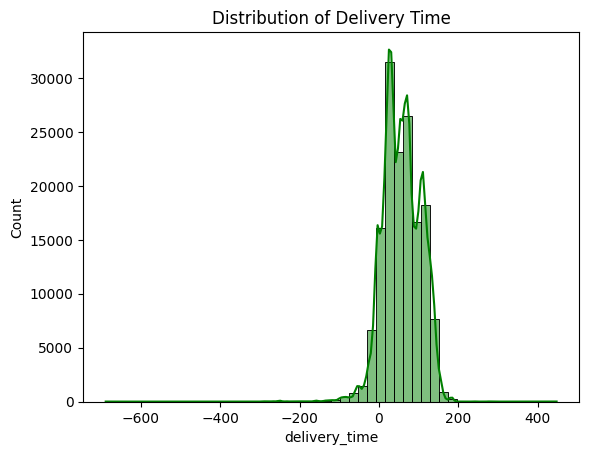

In [ ]:
sns.histplot(data=df,x=df['delivery_time'],kde=True,bins=50,color='green')
plt.title(f'Distribution of Delivery Time')

In [ ]:
df = df[~(df['delivery_time']<0)]

In [ ]:
# Extract day, month, and year from 'delivery_date' and 'item_date'
df['delivery_year'] = df['delivery_date'].dt.year
df['delivery_month'] = df['delivery_date'].dt.month
df['delivery_day'] = df['delivery_date'].dt.day

df['item_year'] = df['item_date'].dt.year
df['item_month'] = df['item_date'].dt.month
df['item_day'] = df['item_date'].dt.day

In [ ]:
df.drop(columns=['delivery_date','item_date'],inplace=True)

### Preprocessing of Categorical Variables

In [ ]:
print('No. Unique Values')
for col in category:
    print(f'{col}:{df[col].nunique()}')
    print(f'Dtype: {df[col].dtype}')

No. Unique Values
country:17
Dtype: float64
status:2
Dtype: object
item_type:7
Dtype: object
application:30
Dtype: float64
product_ref:30
Dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135792 entries, 0 to 181531
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   quantity_tons   135792 non-null  float64
 1   country         135792 non-null  float64
 2   status          135792 non-null  object 
 3   item_type       135792 non-null  object 
 4   application     135792 non-null  float64
 5   thickness       135792 non-null  float64
 6   width           135792 non-null  float64
 7   product_ref     135792 non-null  int64  
 8   selling_price   135792 non-null  float64
 9   delivery_time   135792 non-null  int64  
 10  delivery_year   135792 non-null  int32  
 11  delivery_month  135792 non-null  int32  
 12  delivery_day    135792 non-null  int32  
 13  item_year       135792 non-null  int32  
 14  item_month      135792 non-null  int32  
 15  item_day        135792 non-null  int32  
dtypes: float64(6), int32(6), int64(2), object(2)
memory usage: 14

## Regression Model

In [ ]:
# One Hot encoding of low-cardinality features
df_reg = df

In [ ]:
df_reg.head()

,quantity_tons,country,status,item_type,application,thickness,width,product_ref,selling_price,delivery_time,delivery_year,delivery_month,delivery_day,item_year,item_month,item_day
0,54.151139,28.0,Won,W,10.0,2.0,1500.0,1670798778,854.0,91,2021,7,1,2021,4,1
1,768.024839,25.0,Won,W,41.0,0.8,1210.0,1668701718,1047.0,0,2021,4,1,2021,4,1
5,225.790676,25.0,Won,W,41.0,1.5,1265.0,1668701718,983.0,0,2021,4,1,2021,4,1
8,69.071853,38.0,Won,S,10.0,0.6,1275.0,1668701376,1363.0,91,2021,7,1,2021,4,1
9,630.626917,25.0,Won,W,41.0,1.5,1165.0,1668701718,983.0,0,2021,4,1,2021,4,1


In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore',drop='first',sparse_output=False)
X = df_reg.drop(columns=['selling_price'])
y = df_reg['selling_price']
categorical_feature_cols = ['status','item_type']
X_cat_transformed = ohe.fit_transform(X[categorical_feature_cols])
ohe_col_names = ohe.get_feature_names_out(categorical_feature_cols)

In [ ]:
# joblib.dump(ohe,'ohe.pkl')

In [ ]:
X_cat = pd.DataFrame(X_cat_transformed,columns=ohe_col_names,index=X.index)

In [ ]:
X_num = X.drop(columns=['status','item_type'])
x_final = pd.concat([X_num,X_cat],axis=1)
x_final

,quantity_tons,country,application,thickness,width,product_ref,delivery_time,delivery_year,delivery_month,delivery_day,item_year,item_month,item_day,status_Won,item_type_Others,item_type_PL,item_type_S,item_type_SLAWR,item_type_W,item_type_WI
0,54.151139,28.0,10.0,2.00,1500.0,1670798778,91,2021,7,1,2021,4,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,768.024839,25.0,41.0,0.80,1210.0,1668701718,0,2021,4,1,2021,4,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,225.790676,25.0,41.0,1.50,1265.0,1668701718,0,2021,4,1,2021,4,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,69.071853,38.0,10.0,0.60,1275.0,1668701376,91,2021,7,1,2021,4,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,630.626917,25.0,41.0,1.50,1165.0,1668701718,0,2021,4,1,2021,4,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181433,32.216122,25.0,15.0,6.00,2000.0,640665,30,2020,8,1,2020,7,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
181525,66.431473,30.0,10.0,3.85,1525.0,640665,30,2020,8,1,2020,7,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
181527,63.859521,30.0,10.0,5.85,1525.0,640665,30,2020,8,1,2020,7,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
181529,56.028562,30.0,10.0,7.85,1500.0,640665,30,2020,8,1,2020,7,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# X_train,X_test,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=42)
X_train,X_test,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

def evaluate_regression_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Model: {type(model).__name__}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2: {r2:.4f}")
    print(f"MAE: {mae:.4f}")

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
evaluate_regression_model(linear_regression_model, X_train, X_test, y_train_scaled, y_test_scaled)

Model: LinearRegression
MSE: 20512.7573
RMSE: 143.2228
R2: 0.5082
MAE: 103.5241


In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg_model = DecisionTreeRegressor(random_state=42,min_samples_split=50,min_samples_leaf=1)
evaluate_regression_model(dt_reg_model, X_train, X_test, y_train_scaled, y_test_scaled)

Model: DecisionTreeRegressor
MSE: 4962.9779
RMSE: 70.4484
R2: 0.8810
MAE: 33.6425


In [ ]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_reg_model = RandomForestRegressor(random_state=42,n_estimators=15,min_samples_split=15)
evaluate_regression_model(rf_reg_model, X_train, X_test, y_train_scaled, y_test_scaled)

Model: RandomForestRegressor
MSE: 4287.5343
RMSE: 65.4793
R2: 0.8972
MAE: 28.1957


In [ ]:
# model = RandomForestRegressor(random_state=42,n_estimators=15,min_samples_split=10)
# model.fit(X_train,y_train_scaled)
# import pickle
# with open("reg_model.pkl", "wb") as f:
#     pickle.dump(model, f)

In [ ]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb_reg_model = GradientBoostingRegressor(random_state=42)
evaluate_regression_model(gb_reg_model, X_train, X_test, y_train_scaled, y_test_scaled)

Model: GradientBoostingRegressor
MSE: 6478.3842
RMSE: 80.4884
R2: 0.8447
MAE: 47.2247


### Classification

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135792 entries, 0 to 181531
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   quantity_tons   135792 non-null  float64
 1   country         135792 non-null  float64
 2   status          135792 non-null  object 
 3   item_type       135792 non-null  object 
 4   application     135792 non-null  float64
 5   thickness       135792 non-null  float64
 6   width           135792 non-null  float64
 7   product_ref     135792 non-null  int64  
 8   selling_price   135792 non-null  float64
 9   delivery_time   135792 non-null  int64  
 10  delivery_year   135792 non-null  int32  
 11  delivery_month  135792 non-null  int32  
 12  delivery_day    135792 non-null  int32  
 13  item_year       135792 non-null  int32  
 14  item_month      135792 non-null  int32  
 15  item_day        135792 non-null  int32  
dtypes: float64(6), int32(6), int64(2), object(2)
memory usage: 14

In [ ]:
df.status.value_counts()

,count
status,
Won,101983
Lost,33809


In [ ]:
df_cla = df

In [ ]:
df_cla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135792 entries, 0 to 181531
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   quantity_tons   135792 non-null  float64
 1   country         135792 non-null  float64
 2   status          135792 non-null  object 
 3   item_type       135792 non-null  object 
 4   application     135792 non-null  float64
 5   thickness       135792 non-null  float64
 6   width           135792 non-null  float64
 7   product_ref     135792 non-null  int64  
 8   selling_price   135792 non-null  float64
 9   delivery_time   135792 non-null  int64  
 10  delivery_year   135792 non-null  int32  
 11  delivery_month  135792 non-null  int32  
 12  delivery_day    135792 non-null  int32  
 13  item_year       135792 non-null  int32  
 14  item_month      135792 non-null  int32  
 15  item_day        135792 non-null  int32  
dtypes: float64(6), int32(6), int64(2), object(2)
memory usage: 14

In [ ]:
df_cla.status.value_counts()

,count
status,
Won,101983
Lost,33809


In [ ]:
df_cla['status'] = df_cla['status'].map({'Won': 1, 'Lost': 0})

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore',drop='first',sparse_output=False)
X = df_cla.drop(columns=['status'])
y = df_cla['status']
categorical_feature_cols = ['item_type']
X_cat_transformed = ohe.fit_transform(X[categorical_feature_cols])
ohe_col_names = ohe.get_feature_names_out(categorical_feature_cols)

In [ ]:
# joblib.dump(ohe,'ohe_cla.pkl')

In [ ]:
X_cat = pd.DataFrame(X_cat_transformed,columns=ohe_col_names,index=X.index)

In [ ]:
X_num = X.drop(columns=['item_type'])
x_final = pd.concat([X_num,X_cat],axis=1)
x_final

,quantity_tons,country,application,thickness,width,product_ref,selling_price,delivery_time,delivery_year,delivery_month,delivery_day,item_year,item_month,item_day,item_type_Others,item_type_PL,item_type_S,item_type_SLAWR,item_type_W,item_type_WI
0,54.151139,28.0,10.0,2.00,1500.0,1670798778,854.0,91,2021,7,1,2021,4,1,0.0,0.0,0.0,0.0,1.0,0.0
1,768.024839,25.0,41.0,0.80,1210.0,1668701718,1047.0,0,2021,4,1,2021,4,1,0.0,0.0,0.0,0.0,1.0,0.0
5,225.790676,25.0,41.0,1.50,1265.0,1668701718,983.0,0,2021,4,1,2021,4,1,0.0,0.0,0.0,0.0,1.0,0.0
8,69.071853,38.0,10.0,0.60,1275.0,1668701376,1363.0,91,2021,7,1,2021,4,1,0.0,0.0,1.0,0.0,0.0,0.0
9,630.626917,25.0,41.0,1.50,1165.0,1668701718,983.0,0,2021,4,1,2021,4,1,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181433,32.216122,25.0,15.0,6.00,2000.0,640665,552.0,30,2020,8,1,2020,7,2,0.0,0.0,1.0,0.0,0.0,0.0
181525,66.431473,30.0,10.0,3.85,1525.0,640665,458.0,30,2020,8,1,2020,7,2,0.0,0.0,1.0,0.0,0.0,0.0
181527,63.859521,30.0,10.0,5.85,1525.0,640665,457.0,30,2020,8,1,2020,7,2,0.0,0.0,1.0,0.0,0.0,0.0
181529,56.028562,30.0,10.0,7.85,1500.0,640665,458.0,30,2020,8,1,2020,7,2,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_final, y)

In [ ]:
y_resampled.value_counts()

,count
status,
1,101983
0,101983


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def evaluate_classification_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(random_state=42)
evaluate_classification_model(log_reg_model, X_train, X_test, y_train, y_test)

Model: LogisticRegression
Accuracy: 0.5390
Precision: 0.5272
Recall: 0.7410
F1-score: 0.6161
ROC AUC Score: 0.5394
Confusion Matrix:
[[ 6903 13531]
 [ 5273 15087]]


In [ ]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
dt_clf_model = DecisionTreeClassifier(random_state=42,min_samples_leaf=10)
evaluate_classification_model(dt_clf_model, X_train, X_test, y_train, y_test)

Model: DecisionTreeClassifier
Accuracy: 0.9413
Precision: 0.9489
Recall: 0.9326
F1-score: 0.9406
ROC AUC Score: 0.9413
Confusion Matrix:
[[19411  1023]
 [ 1373 18987]]


In [ ]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_clf_model = RandomForestClassifier(random_state=42,n_estimators=20,min_samples_leaf=5)
evaluate_classification_model(rf_clf_model, X_train, X_test, y_train, y_test)

Model: RandomForestClassifier
Accuracy: 0.9585
Precision: 0.9710
Recall: 0.9450
F1-score: 0.9578
ROC AUC Score: 0.9584
Confusion Matrix:
[[19860   574]
 [ 1120 19240]]


In [ ]:
# import pickle
# model = RandomForestClassifier(random_state=42,n_estimators=20,min_samples_leaf=5)
# model.fit(X_train,y_train)
# with open("cla_model.pkl", "wb") as f:
#     pickle.dump(model, f)

In [ ]:
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
evaluate_classification_model(knn_model, X_train, X_test, y_train, y_test)

Model: KNeighborsClassifier
Accuracy: 0.8699
Precision: 0.9262
Recall: 0.8034
F1-score: 0.8604
ROC AUC Score: 0.8698
Confusion Matrix:
[[19131  1303]
 [ 4003 16357]]
